In [1]:
# Mengatur jumlah thread CPU yang akan digunakan
import os
os.environ['LOKY_MAX_CPU_COUNT'] = '12'  # Mengatur maksimal 12 core CPU

In [2]:

# Read Dataset
from sklearn.datasets import load_iris
import pandas as pd

# Memuat dataset iris
iris = load_iris()

# Mengkonversi dataset iris ke DataFrame pandas
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Menambahkan kolom target
df['species'] = iris.target

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB
None

Statistik Deskriptif:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%     

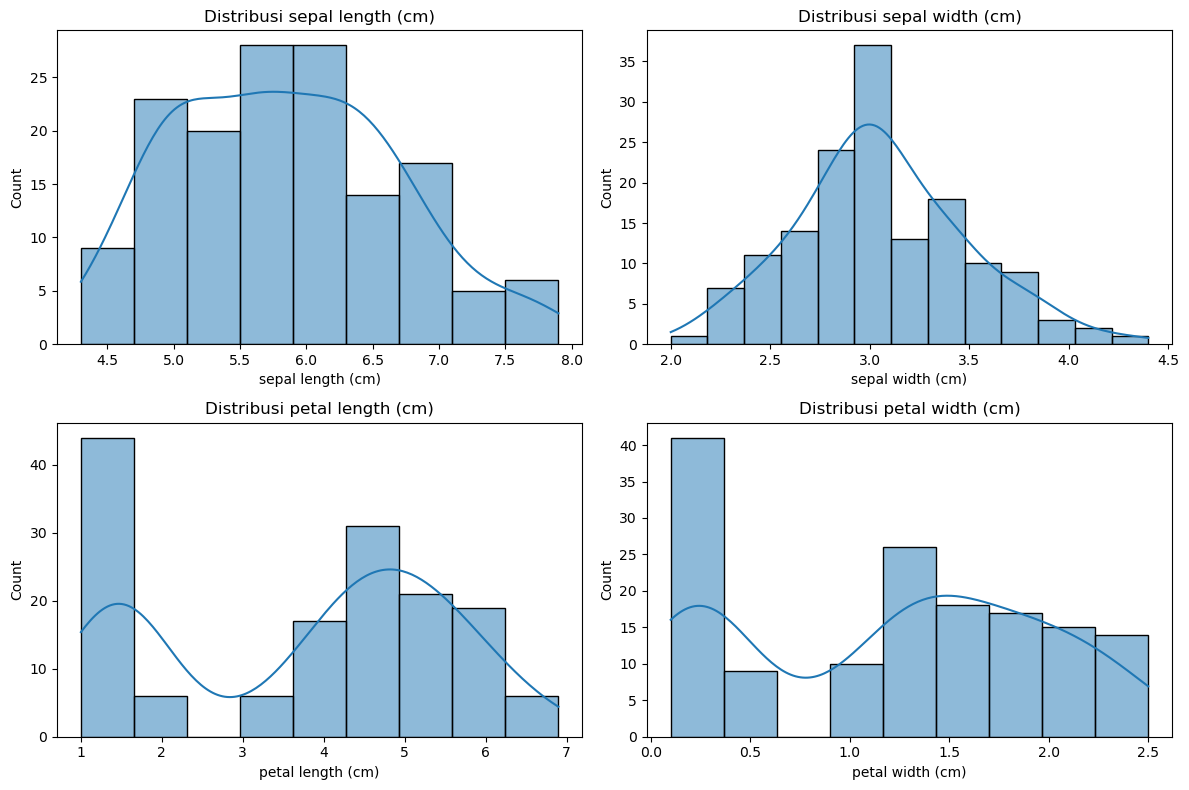

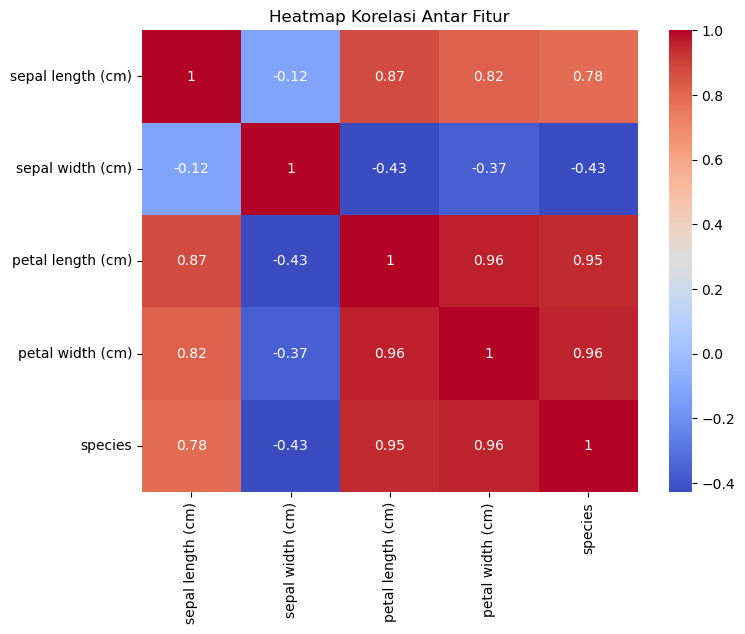

In [3]:
# Melakukan EDA (Exploratory Data Analysis) pada dataset iris
print("Informasi Dataset:")
print(df.info())
print("\nStatistik Deskriptif:")
print(df.describe())

# Mengecek distribusi target
print("\nDistribusi Target (Species):")
print(df['species'].value_counts())

# Visualisasi distribusi fitur
import matplotlib.pyplot as plt
import seaborn as sns

# Membuat histogram untuk setiap fitur
plt.figure(figsize=(12, 8))
for i, feature in enumerate(iris.feature_names):
    plt.subplot(2, 2, i+1)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribusi {feature}')
plt.tight_layout()
plt.show()

# Membuat heatmap korelasi
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi Antar Fitur')
plt.show()


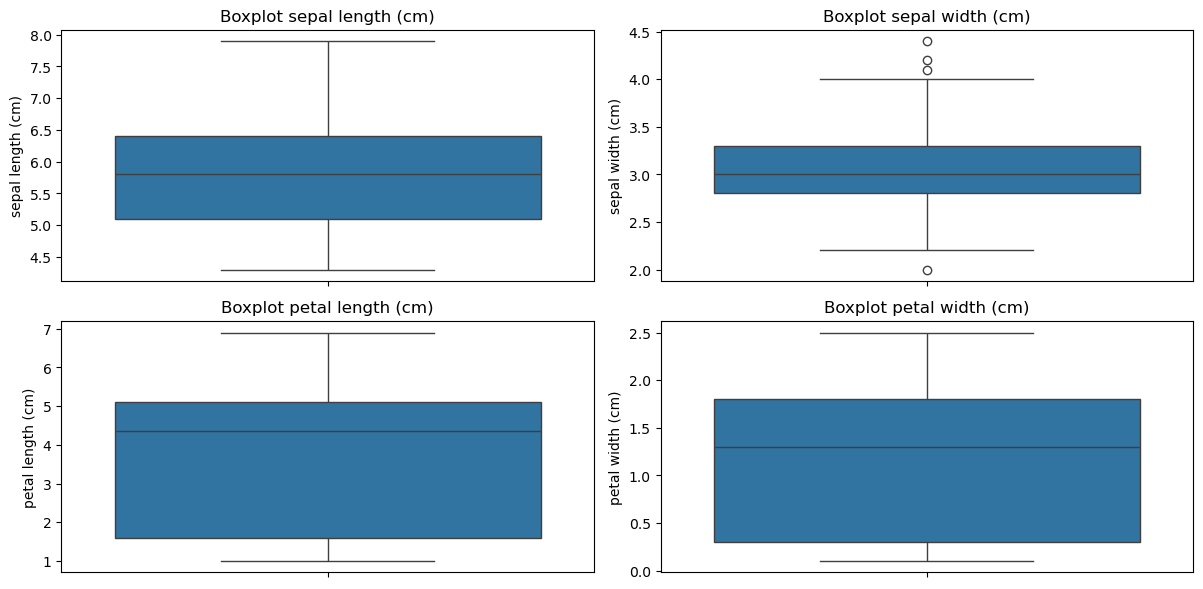


Deteksi Outlier Menggunakan IQR:

Outlier pada sepal length (cm):
Batas bawah: 3.15, Batas atas: 8.35
Jumlah outlier: 0

Outlier pada sepal width (cm):
Batas bawah: 2.05, Batas atas: 4.05
Jumlah outlier: 4
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
15                5.7               4.4                1.5               0.4   
32                5.2               4.1                1.5               0.1   
33                5.5               4.2                1.4               0.2   
60                5.0               2.0                3.5               1.0   

    species  
15        0  
32        0  
33        0  
60        1  

Outlier pada petal length (cm):
Batas bawah: -3.65, Batas atas: 10.35
Jumlah outlier: 0

Outlier pada petal width (cm):
Batas bawah: -1.95, Batas atas: 4.05
Jumlah outlier: 0


In [4]:
# Mengecek outlier menggunakan boxplot
plt.figure(figsize=(12, 6))
for i, feature in enumerate(iris.feature_names):
    plt.subplot(2, 2, i+1)
    sns.boxplot(y=df[feature])
    plt.title(f'Boxplot {feature}')
plt.tight_layout()
plt.show()

# Mengecek outlier menggunakan IQR (Interquartile Range)
print("\nDeteksi Outlier Menggunakan IQR:")
for feature in iris.feature_names:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    print(f"\nOutlier pada {feature}:")
    print(f"Batas bawah: {lower_bound:.2f}, Batas atas: {upper_bound:.2f}")
    print(f"Jumlah outlier: {len(outliers)}")
    if len(outliers) > 0:
        print(outliers)


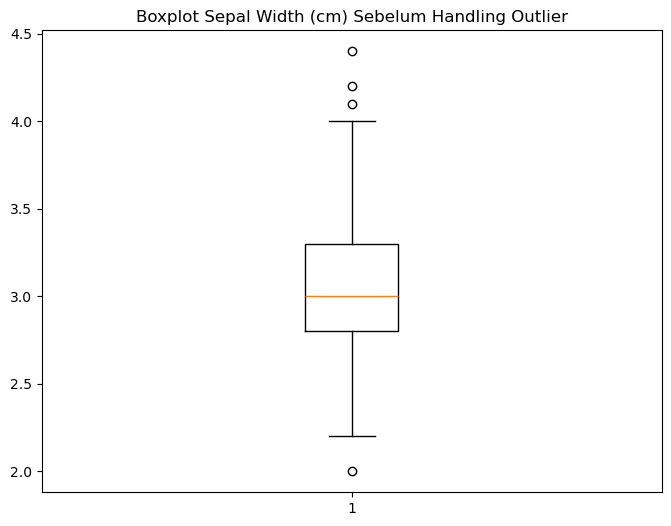

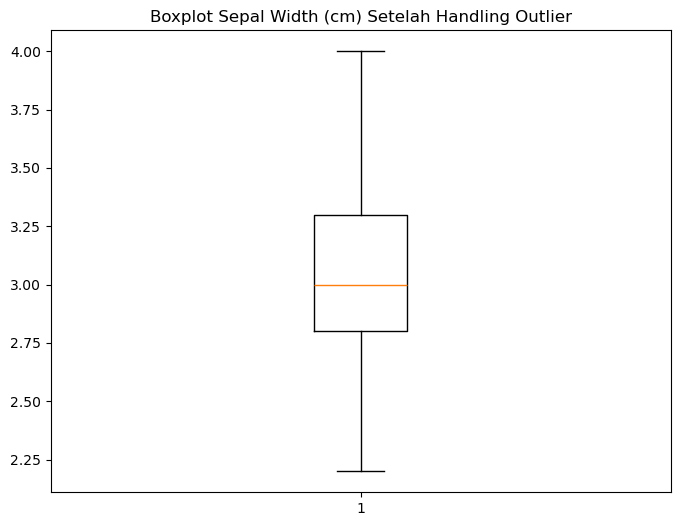

Jumlah data sebelum handling outlier: 150
Jumlah data setelah handling outlier: 146


In [5]:
# Handle outlier

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Visualisasi boxplot sebelum handling outlier
plt.figure(figsize=(8, 6))
plt.boxplot(df['sepal width (cm)'])
plt.title('Boxplot Sepal Width (cm) Sebelum Handling Outlier')
plt.show()

# Hitung IQR (Interquartile Range)
Q1 = df['sepal width (cm)'].quantile(0.25)
Q3 = df['sepal width (cm)'].quantile(0.75)
IQR = Q3 - Q1

# Tentukan batas bawah dan atas untuk outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter outlier
df_filtered = df[(df['sepal width (cm)'] >= lower_bound) & (df['sepal width (cm)'] <= upper_bound)]

# Visualisasi boxplot setelah handling outlier
plt.figure(figsize=(8, 6))
plt.boxplot(df_filtered['sepal width (cm)'])
plt.title('Boxplot Sepal Width (cm) Setelah Handling Outlier')
plt.show()

# Tampilkan jumlah data sebelum dan setelah handling outlier
print(f"Jumlah data sebelum handling outlier: {len(df)}")
print(f"Jumlah data setelah handling outlier: {len(df_filtered)}")

In [6]:
# Preprocessing data untuk LightGBM
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Pisahkan fitur dan target
X = df_filtered[iris.feature_names]  # Gunakan data yang sudah difilter
y = iris.target[df_filtered.index]   # Sesuaikan target dengan data yang tersisa

# Encode target jika diperlukan (untuk klasifikasi multiclass)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Bagi data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# scaling
from sklearn.preprocessing import StandardScaler
scaled = StandardScaler()
X_train_scaled = scaled.fit_transform(X_train)
X_test_scaled = scaled.transform(X_test)

In [13]:
# Import library LightGBM
import lightgbm as lgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Inisialisasi model LightGBM
lgb_model = lgb.LGBMClassifier(
    objective='multiclass',
    random_state=42,
    n_estimators=100,
    learning_rate=0.05,
    max_depth=10
)

# Training model
print("Memulai training model LightGBM...")
lgb_model.fit(X_train_scaled, y_train)

# Prediksi pada data test
y_pred = lgb_model.predict(X_test_scaled)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAkurasi model: {accuracy:.2f}")

# Tampilkan classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Memulai training model LightGBM...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000042 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 86
[LightGBM] [Info] Number of data points in the train set: 116, number of used features: 4
[LightGBM] [Info] Start training from score -1.142672
[LightGBM] [Info] Start training from score -1.090029
[LightGBM] [Info] Start training from score -1.064711
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

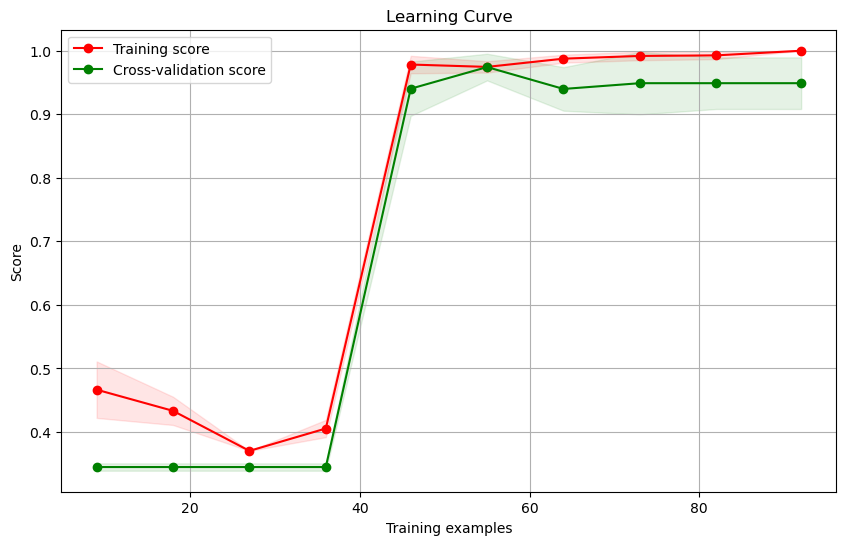

In [14]:
# learning curve berdasarkan Modeling

from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

# Generate learning curve
train_sizes, train_scores, test_scores = learning_curve(
    lgb_model, X_train_scaled, y_train, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calculate mean and standard deviation for training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.title('Learning Curve')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.legend(loc="best")
plt.grid()
plt.show()

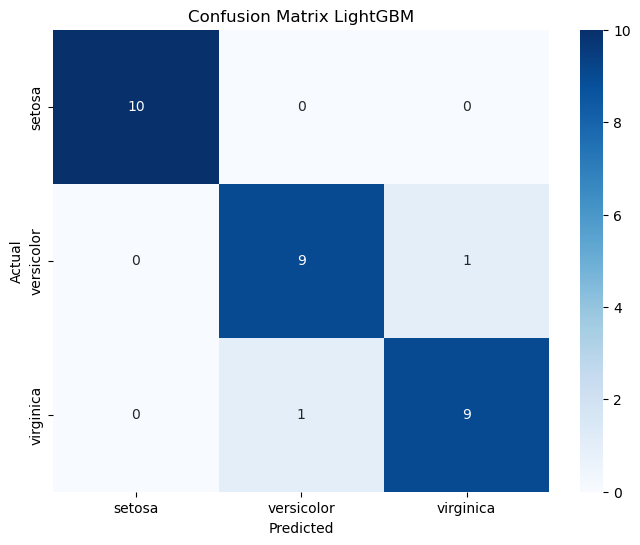

In [15]:
# Visualisasi confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), 
            annot=True, 
            fmt='d', 
            cmap='Blues',
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.title('Confusion Matrix LightGBM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Karna Overfitting jadi kita coba menggunakan hyperparameter tuning dengan randomizedsearchcv agar cepat prosesnya

In [18]:
# RandomSearchCV
from sklearn.model_selection import RandomizedSearchCV
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report
from scipy.stats import uniform, randint

# Define the parameter distributions for LightGBM
param_distributions = {
    'learning_rate': uniform(0.005, 0.1),  # Continuous uniform distribution between 0.001 and 0.101
    'n_estimators': randint(150, 401),  # Random integers between 100 and 500
    'max_depth': randint(2, 10),  # Random integers between 3 and 9
    'num_leaves': randint(21, 201),  # Random integers between 31 and 200
    'min_child_samples': randint(5, 51)  # Random integers between 10 and 50
}

# Create LightGBM classifier
lgb_classifier = LGBMClassifier(random_state=42)

# Setup RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=lgb_classifier,
    param_distributions=param_distributions,
    n_iter=20,  # Number of parameter settings that are sampled
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2,
    random_state=42
)

# Fit the model (assuming X_train and y_train are your training data)
random_search.fit(X_train, y_train)

# Get best parameters and score
print("Best parameters:", random_search.best_params_)
print("Best cross-validation score:", random_search.best_score_)

# gunakan model terbaik
best_model = random_search.best_estimator_

# prediksi model
y_pred_best = best_model.predict(X_test)

# evaluasi model
accuracy = accuracy_score(y_test, y_pred_best)
print(f'Accuracy: {accuracy}')

# classification report
classification_rep = classification_report(y_test, y_pred_best)
print(f'Classification Report:\n{classification_rep}')


Fitting 5 folds for each of 20 candidates, totalling 100 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000081 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 85
[LightGBM] [Info] Number of data points in the train set: 116, number of used features: 4
[LightGBM] [Info] Start training from score -1.142672
[LightGBM] [Info] Start training from score -1.090029
[LightGBM] [Info] Start training from score -1.064711
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further split

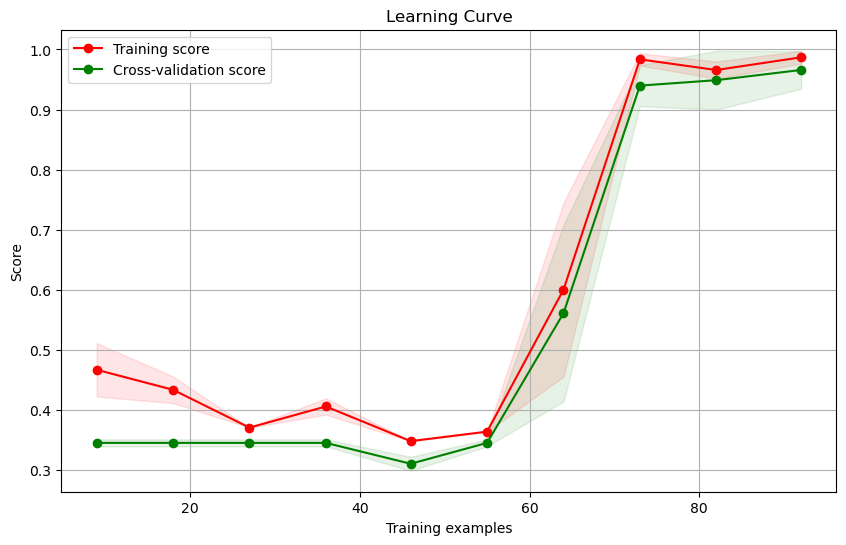

In [19]:
# learning curve berdasarkan RandomizedSearchCV

from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

# Generate learning curve
train_sizes, train_scores, test_scores = learning_curve(
    best_model, X_train_scaled, y_train, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calculate mean and standard deviation for training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.title('Learning Curve')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.legend(loc="best")
plt.grid()
plt.show()